In [1]:
import sys
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import urllib
from threading import Thread
from queue import Queue
import math
import requests
import time 
from datetime import timedelta
import pickle
from datetime import datetime

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns
sns.set(color_codes=True)

In [4]:
df = pd.DataFrame(columns=['author','date','activity', 'text', 'files'])
filne = "log_codemirror.txt"
##with urllib2.urlopen("https://file.io/rSWakX") as f:
with open(filne, 'r+', encoding="utf-8") as f:
    lines = f.readlines()
    ##for i in range(0, 100):
  
    for i in range(0, len(lines)):
        line = lines[i]
        if line[:6] == "commit":
            sha = line[8:].strip()
            ##Author
            line = lines[i+1]
            if line[:6] == "Merge:":
                i = i + 1
                line = lines[i+1]
            divided = line.split("<")
            divided[1][:-2]          
            author = divided[1][:-2]
            ##Author
            line = lines[i+2]
            divided = line.split(":   ")
            date = divided[1].strip()
            line = lines[i+3]  
            text = ""
            if line in ['\n', '\r\n']:
                line = lines[i + 4]
                divided = line.split(":")
                activity = divided[0].strip()
            j = 5
            text += line
            while 1:
                line = lines[i+j]            
                if line in ['\n', '\r\n']:
                    break
                text += line    
                j = j + 1
            j = j + 1
            files = []
            while 1:
                line = lines[i+j]            
                if line in ['\n', '\r\n']:
                    break
                files.append(line)   
                j = j + 1
            print("...........")
            ##print sha
            ##print author
            ##print date
            ##print activity
            ##print files
            print(text)
            df.loc[sha] = pd.Series({'author': author, 'date': date, 'activity': activity, 'text': text, 'files': files})
        


...........
    [css mode] Support lineComment option, enable it for LESS, SCSS

...........
    [sass mode] Use same token types as CSS/SCSS mode. Add tests

...........
    [python mode] Accept underscores in number literals
    
    Closes #4506

...........
    [shell mode] Improve tokenizing of $'' strings
    
    Closes #4505

...........
    Mark version 5.23.0

...........
    [sublime bindings] Don't sort last line with no selected chars
    
    Selecting two full lines including line ends makes a selection from
    line 1 to line 3 (ch: 0). This command used to sort three lines (1 to
    3) which is not what I expect. This change makes it sort only two
    lines if there are no selected characters on the last line.
    
    It also fixes a fatal error if there are more than one selection on
    the same line (the code used 'range' instead of 'ranges').
    
    It also selects the trailing newline after sorting the lines so that
    the whole lines are selected.

..........

IndexError: list index out of range

In [5]:
df.head()

,author,date,activity,text,files
5aed69a5025cbda52960610eb54082f03f5a915,geordiemhall@gmail.com,Mon Jan 23 05:35:59 2017,"[css mode] Support lineComment option, enable ...","[css mode] Support lineComment option, ena...","[ mode/css/css.js | 4 ++++\n, 1 file changed,..."
1af74da531f7ac7b08e6fcad37892dbf5375664,ficristo.work@gmail.com,Thu Dec 22 16:33:50 2016,[sass mode] Use same token types as CSS/SCSS m...,[sass mode] Use same token types as CSS/SC...,"[ mode/sass/index.html | 4 +-\n, mode/sass/..."
9ad3b619ba9ea481f2847fb85aed647b67d17d1,marijn@haverbeke.nl,Fri Jan 20 22:12:11 2017,[python mode] Accept underscores in number lit...,[python mode] Accept underscores in number...,"[ mode/python/python.js | 12 ++++++------\n, ..."
2162728938e8536d39a3f9937d7eb905e00eb9b,marijn@haverbeke.nl,Fri Jan 20 08:25:33 2017,[shell mode] Improve tokenizing of $'' strings,[shell mode] Improve tokenizing of $'' str...,"[ mode/shell/shell.js | 4 ++--\n, 1 file chan..."
3638df40c9631155b1985f0ee63b6ffe2398b6a,marijn@haverbeke.nl,Thu Jan 19 23:35:01 2017,Mark version 5.23.0,Mark version 5.23.0\n,"[ AUTHORS | 3 +++\n, CHANGELOG.md ..."


In [6]:
len(df)

5499

In [7]:
df['changes'] = pd.Series(df['files'].str[-1], index=df.index)

In [8]:
df['n_files'] = pd.Series(df['changes'].str.split().str[0] , index=df.index)
df['insertions'] = pd.Series(df['changes'].str.split(",").str[1].str.split().str[0] , index=df.index)
df['deletions'] = pd.Series(df['changes'].str.split(",").str[2].str.split().str[0] , index=df.index)


In [9]:
del df['changes']
df.head()

,author,date,activity,text,files,n_files,insertions,deletions
5aed69a5025cbda52960610eb54082f03f5a915,geordiemhall@gmail.com,Mon Jan 23 05:35:59 2017,"[css mode] Support lineComment option, enable ...","[css mode] Support lineComment option, ena...","[ mode/css/css.js | 4 ++++\n, 1 file changed,...",1,4,NaN
1af74da531f7ac7b08e6fcad37892dbf5375664,ficristo.work@gmail.com,Thu Dec 22 16:33:50 2016,[sass mode] Use same token types as CSS/SCSS m...,[sass mode] Use same token types as CSS/SC...,"[ mode/sass/index.html | 4 +-\n, mode/sass/...",4,161,19
9ad3b619ba9ea481f2847fb85aed647b67d17d1,marijn@haverbeke.nl,Fri Jan 20 22:12:11 2017,[python mode] Accept underscores in number lit...,[python mode] Accept underscores in number...,"[ mode/python/python.js | 12 ++++++------\n, ...",1,6,6
2162728938e8536d39a3f9937d7eb905e00eb9b,marijn@haverbeke.nl,Fri Jan 20 08:25:33 2017,[shell mode] Improve tokenizing of $'' strings,[shell mode] Improve tokenizing of $'' str...,"[ mode/shell/shell.js | 4 ++--\n, 1 file chan...",1,2,2
3638df40c9631155b1985f0ee63b6ffe2398b6a,marijn@haverbeke.nl,Thu Jan 19 23:35:01 2017,Mark version 5.23.0,Mark version 5.23.0\n,"[ AUTHORS | 3 +++\n, CHANGELOG.md ...",7,45,16


In [10]:
df['n_files'] = df.n_files.apply(pd.to_numeric, args=('coerce',))
df['insertions'] = df.insertions.apply(pd.to_numeric, args=('coerce',))
df['deletions'] = df.deletions.apply(pd.to_numeric, args=('coerce',))


In [11]:
df.head()

,author,date,activity,text,files,n_files,insertions,deletions
5aed69a5025cbda52960610eb54082f03f5a915,geordiemhall@gmail.com,Mon Jan 23 05:35:59 2017,"[css mode] Support lineComment option, enable ...","[css mode] Support lineComment option, ena...","[ mode/css/css.js | 4 ++++\n, 1 file changed,...",1.0,4.0,NaN
1af74da531f7ac7b08e6fcad37892dbf5375664,ficristo.work@gmail.com,Thu Dec 22 16:33:50 2016,[sass mode] Use same token types as CSS/SCSS m...,[sass mode] Use same token types as CSS/SC...,"[ mode/sass/index.html | 4 +-\n, mode/sass/...",4.0,161.0,19.0
9ad3b619ba9ea481f2847fb85aed647b67d17d1,marijn@haverbeke.nl,Fri Jan 20 22:12:11 2017,[python mode] Accept underscores in number lit...,[python mode] Accept underscores in number...,"[ mode/python/python.js | 12 ++++++------\n, ...",1.0,6.0,6.0
2162728938e8536d39a3f9937d7eb905e00eb9b,marijn@haverbeke.nl,Fri Jan 20 08:25:33 2017,[shell mode] Improve tokenizing of $'' strings,[shell mode] Improve tokenizing of $'' str...,"[ mode/shell/shell.js | 4 ++--\n, 1 file chan...",1.0,2.0,2.0
3638df40c9631155b1985f0ee63b6ffe2398b6a,marijn@haverbeke.nl,Thu Jan 19 23:35:01 2017,Mark version 5.23.0,Mark version 5.23.0\n,"[ AUTHORS | 3 +++\n, CHANGELOG.md ...",7.0,45.0,16.0


In [12]:
pattern_code = ".*\.awk(~?)|.*\.scm(~?)|.*\.glsl(~?)|.*\.patch(~?)|.*\.c((\.swp)?)(~?)|.*/script(s?)/.*|.*\.jar(~?)|.*/src/.*|.*\.m((\.swp)?)(~?)|.*\.cs(~?)|.*\.idl(~?)|.*\.s(~?)|.*\.r((\.swp)?)(~?)|.*\.cxx(~?)|.*\.pyc(~?)|.*\.asm(x?)(~?)|.*\.py((\.swp)?)(~?)|.*\.y((\.swp)?)(~?)|.*\.gi((\.swp)?)(∼?)|.*\.t((\.swp)?)(~?)|.*\.dll(~?)|.*\.h˙template((\.swp)?)(∼?)|.*\.js((\.swp)?)(~?)|.*\.rb((\.swp)?)(~?)|.*\.c˙template((\.swp)?)(∼ ?)|.*\.hg((\.swp)?)(~?)|.*\.pm((\.swp)?)(~?)|.*\.php((\.swp)?)(\d?)(∼ ?)|.*\.cc((\.swp)?)(~?)|.*\.sh((\.swp)?)(~?)|.*\.php((\.swp)?)(\d?)(∼ ?)|.*\.el((\.swp)?)(~?)|.*\.hh((\.swp)?)(~?)|.*\.h((pp)?)((\.swp)?)(∼ ?)|.*\.xs((\.swp)?)(~?)|.*\.pl((\.swp)?)(~?)|.*\.h\.tmpl((\.swp)?)(∼?)|.*\.mm((\.swp)?)(~?)|.*\.idl((\.swp)?)(~?)|.*\.h.win32((\.swp)?)(∼ ?)|.*\.xpt((\.swp)?)(~?)|.*\.ccg((\.swp)?)(~?)|.*\.c˙tmpl((\.swp)?)(∼?)|.*\.snk((\.swp)?)(~?)|.*\.inc((\.swp)?)(~?)|.*\.asp(x?)((\.swp)?)(∼ ?)|.*\.cpp((\.swp)?)(~?)|.*\.gob((\.swp)?)(~?)|.*\.vapi((\.swp)?)(∼?)|.*\.giv((\.swp)?)(~?)|.*\.dtd((\.swp)?)(~?)|.*\.gidl((\.swp)?)(∼?)|.*\.giv((\.swp)?)(~?)|.*\.ada((\.swp)?)(~?)|.*\.defs((\.swp)?)(∼?)|.*\.tcl((\.swp)?)(~?)|.*\.vbs((\.swp)?)(~?)|.*\.java((\.swp)?)(∼?)|.*\.nib((\.swp)?)(~?)|.*\.sed((\.swp)?)(~?)|.*\.vala((˙swp)?)(∼?)"
pattern_doc = "|.*\.zabw|.*/potfiles|.*/install|.*\.wml|.*\.chm|.*\.ods|.*/copyright|.*/version|.*\.css|.*\.vcard(~?)|.*/plan|.*/feature(s?)|.*\.txt((\.bak)?)|.*/credits|.*/notes|.*/licence|.*\.txt((\.old)?)|.*\.man|.*/howto|.*/license|.*\.rtf|.*\.ics|.*/faq|.*/maintainers|.*\.tex|.*/documenters|.*copying|.*/copying|.*\.sgml|.*\.gnumeric|.*/copying.*|.*/committers|.*\.eps|.*\.vcf|.*/doc(s?)/.*|.*/thanks|.*\.xsd|.*\.schemas|.*/help(s?)/.*|.*/authors|.*\.texi|.*\.doc|.*/bugs|.*\.docx"
pattern_test = ".*\.test(s?)/.*|.*/.*test\..*|.*/test.*\..*"
pattern_build = "|.*\.m4(~?)|.*makefile.*|.*\.prj|.*\.plo|.*\.mk|.*\.make|.*\.deps|.*\.wxiproj|.*\.am(~?)|.*\.mp4|.*\.builder|.*\.lo|.*\.target|.*\.iss|.*\.nsi|.*\.wxi|.*/configure((\..+)?)|.*\.wxs|.*/mkbundle\..+|.*\.in|.*/autogen\.((.+\.)?)sh|.*\.wpj|.*\.vc(x?)proj(i?)n((\.filters((in)?))?)|.*\.vcproj((\.filters((in)?))?)"

In [13]:
df['pat_code'] = 0
df['pat_doc'] = 0
df['pat_test'] = 0
df['pat_build'] = 0
df.head()

,author,date,activity,text,files,n_files,insertions,deletions,pat_code,pat_doc,pat_test,pat_build
5aed69a5025cbda52960610eb54082f03f5a915,geordiemhall@gmail.com,Mon Jan 23 05:35:59 2017,"[css mode] Support lineComment option, enable ...","[css mode] Support lineComment option, ena...","[ mode/css/css.js | 4 ++++\n, 1 file changed,...",1.0,4.0,NaN,0,0,0,0
1af74da531f7ac7b08e6fcad37892dbf5375664,ficristo.work@gmail.com,Thu Dec 22 16:33:50 2016,[sass mode] Use same token types as CSS/SCSS m...,[sass mode] Use same token types as CSS/SC...,"[ mode/sass/index.html | 4 +-\n, mode/sass/...",4.0,161.0,19.0,0,0,0,0
9ad3b619ba9ea481f2847fb85aed647b67d17d1,marijn@haverbeke.nl,Fri Jan 20 22:12:11 2017,[python mode] Accept underscores in number lit...,[python mode] Accept underscores in number...,"[ mode/python/python.js | 12 ++++++------\n, ...",1.0,6.0,6.0,0,0,0,0
2162728938e8536d39a3f9937d7eb905e00eb9b,marijn@haverbeke.nl,Fri Jan 20 08:25:33 2017,[shell mode] Improve tokenizing of $'' strings,[shell mode] Improve tokenizing of $'' str...,"[ mode/shell/shell.js | 4 ++--\n, 1 file chan...",1.0,2.0,2.0,0,0,0,0
3638df40c9631155b1985f0ee63b6ffe2398b6a,marijn@haverbeke.nl,Thu Jan 19 23:35:01 2017,Mark version 5.23.0,Mark version 5.23.0\n,"[ AUTHORS | 3 +++\n, CHANGELOG.md ...",7.0,45.0,16.0,0,0,0,0


In [14]:
import re
for index, row in df.iterrows():
    code = 0
    doc = 0
    test = 0
    build = 0
    for j in range(0, len(row['files'])):
        match_code = re.match(pattern_code, row['files'][j], flags=0)
        if match_code:
            code += 1
        match_doc = re.match(pattern_doc, row['files'][j], flags=0)
        if match_doc:
            doc += 1
        match_test = re.match(pattern_test, row['files'][j], flags=0)
        if match_test:
            test += 1
        match_build = re.match(pattern_build, row['files'][j], flags=0)
        if match_build:
            build += 1
    
    df.set_value(index, 'pat_code', code) 
    df.set_value(index, 'pat_doc', doc) 
    df.set_value(index, 'pat_test', test) 
    df.set_value(index, 'pat_build', build) 
df.head()
    

,author,date,activity,text,files,n_files,insertions,deletions,pat_code,pat_doc,pat_test,pat_build
5aed69a5025cbda52960610eb54082f03f5a915,geordiemhall@gmail.com,Mon Jan 23 05:35:59 2017,"[css mode] Support lineComment option, enable ...","[css mode] Support lineComment option, ena...","[ mode/css/css.js | 4 ++++\n, 1 file changed,...",1.0,4.0,NaN,1,2,0,2
1af74da531f7ac7b08e6fcad37892dbf5375664,ficristo.work@gmail.com,Thu Dec 22 16:33:50 2016,[sass mode] Use same token types as CSS/SCSS m...,[sass mode] Use same token types as CSS/SC...,"[ mode/sass/index.html | 4 +-\n, mode/sass/...",4.0,161.0,19.0,2,5,1,5
9ad3b619ba9ea481f2847fb85aed647b67d17d1,marijn@haverbeke.nl,Fri Jan 20 22:12:11 2017,[python mode] Accept underscores in number lit...,[python mode] Accept underscores in number...,"[ mode/python/python.js | 12 ++++++------\n, ...",1.0,6.0,6.0,1,2,0,2
2162728938e8536d39a3f9937d7eb905e00eb9b,marijn@haverbeke.nl,Fri Jan 20 08:25:33 2017,[shell mode] Improve tokenizing of $'' strings,[shell mode] Improve tokenizing of $'' str...,"[ mode/shell/shell.js | 4 ++--\n, 1 file chan...",1.0,2.0,2.0,1,2,0,2
3638df40c9631155b1985f0ee63b6ffe2398b6a,marijn@haverbeke.nl,Thu Jan 19 23:35:01 2017,Mark version 5.23.0,Mark version 5.23.0\n,"[ AUTHORS | 3 +++\n, CHANGELOG.md ...",7.0,45.0,16.0,3,8,0,8


In [15]:
df.insertions.describe()

D:\Anaconda\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


count    5488.000000
mean       37.254009
std       189.837873
min         0.000000
25%              NaN
50%              NaN
75%              NaN
max      9460.000000
Name: insertions, dtype: float64

In [16]:
comment_code = "(?:^|\W)cod(?:$|)"
comment_doc = "(?:^|\W)doc(?:$|)"
comment_test = "(?:^|\W)test(?:$|)"
comment_build = "(?:^|\W)build(?:$|)"


In [17]:
df['text_code'] = 0
df['text_doc'] = 0
df['text_test'] = 0
df['text_build'] = 0

In [18]:
match_code = re.findall(comment_code, df['text'][1], re.IGNORECASE)
match_doc = re.findall(comment_doc, df['text'][1], re.IGNORECASE)
match_test = re.findall(comment_test, df['text'][1], re.IGNORECASE)
match_build = re.findall(comment_build, df['text'][1], re.IGNORECASE)


In [19]:
for index, row in df.iterrows():   
    match_code = re.findall(comment_code, row['text'], re.IGNORECASE)
    match_doc = re.findall(comment_doc, row['text'], re.IGNORECASE)
    match_test = re.findall(comment_test, row['text'], re.IGNORECASE)
    match_build = re.findall(comment_build, row['text'], re.IGNORECASE)

    df.set_value(index, 'text_code', len(match_code)) 
    df.set_value(index, 'text_doc', len(match_doc)) 
    df.set_value(index, 'text_test', len(match_test))
    df.set_value(index, 'text_build', len(match_build)) 
df.head()

,author,date,activity,text,files,n_files,insertions,deletions,pat_code,pat_doc,pat_test,pat_build,text_code,text_doc,text_test,text_build
5aed69a5025cbda52960610eb54082f03f5a915,geordiemhall@gmail.com,Mon Jan 23 05:35:59 2017,"[css mode] Support lineComment option, enable ...","[css mode] Support lineComment option, ena...","[ mode/css/css.js | 4 ++++\n, 1 file changed,...",1.0,4.0,NaN,1,2,0,2,0,0,0,0
1af74da531f7ac7b08e6fcad37892dbf5375664,ficristo.work@gmail.com,Thu Dec 22 16:33:50 2016,[sass mode] Use same token types as CSS/SCSS m...,[sass mode] Use same token types as CSS/SC...,"[ mode/sass/index.html | 4 +-\n, mode/sass/...",4.0,161.0,19.0,2,5,1,5,0,0,1,0
9ad3b619ba9ea481f2847fb85aed647b67d17d1,marijn@haverbeke.nl,Fri Jan 20 22:12:11 2017,[python mode] Accept underscores in number lit...,[python mode] Accept underscores in number...,"[ mode/python/python.js | 12 ++++++------\n, ...",1.0,6.0,6.0,1,2,0,2,0,0,0,0
2162728938e8536d39a3f9937d7eb905e00eb9b,marijn@haverbeke.nl,Fri Jan 20 08:25:33 2017,[shell mode] Improve tokenizing of $'' strings,[shell mode] Improve tokenizing of $'' str...,"[ mode/shell/shell.js | 4 ++--\n, 1 file chan...",1.0,2.0,2.0,1,2,0,2,0,0,0,0
3638df40c9631155b1985f0ee63b6ffe2398b6a,marijn@haverbeke.nl,Thu Jan 19 23:35:01 2017,Mark version 5.23.0,Mark version 5.23.0\n,"[ AUTHORS | 3 +++\n, CHANGELOG.md ...",7.0,45.0,16.0,3,8,0,8,0,0,0,0


In [20]:
from textblob import TextBlob

In [21]:
df['subjectivity'] = 0
df['polarity'] = 0

In [22]:
for index, row in df.iterrows(): 
    textblob = TextBlob(row['text'])
    df.set_value(index, 'polarity', textblob.sentiment.polarity) 
    df.set_value(index, 'subjectivity', textblob.sentiment.subjectivity) 
df.head()

,author,date,activity,text,files,n_files,insertions,deletions,pat_code,pat_doc,pat_test,pat_build,text_code,text_doc,text_test,text_build,subjectivity,polarity
5aed69a5025cbda52960610eb54082f03f5a915,geordiemhall@gmail.com,Mon Jan 23 05:35:59 2017,"[css mode] Support lineComment option, enable ...","[css mode] Support lineComment option, ena...","[ mode/css/css.js | 4 ++++\n, 1 file changed,...",1.0,4.0,NaN,1,2,0,2,0,0,0,0,0,0
1af74da531f7ac7b08e6fcad37892dbf5375664,ficristo.work@gmail.com,Thu Dec 22 16:33:50 2016,[sass mode] Use same token types as CSS/SCSS m...,[sass mode] Use same token types as CSS/SC...,"[ mode/sass/index.html | 4 +-\n, mode/sass/...",4.0,161.0,19.0,2,5,1,5,0,0,1,0,0,0
9ad3b619ba9ea481f2847fb85aed647b67d17d1,marijn@haverbeke.nl,Fri Jan 20 22:12:11 2017,[python mode] Accept underscores in number lit...,[python mode] Accept underscores in number...,"[ mode/python/python.js | 12 ++++++------\n, ...",1.0,6.0,6.0,1,2,0,2,0,0,0,0,0,0
2162728938e8536d39a3f9937d7eb905e00eb9b,marijn@haverbeke.nl,Fri Jan 20 08:25:33 2017,[shell mode] Improve tokenizing of $'' strings,[shell mode] Improve tokenizing of $'' str...,"[ mode/shell/shell.js | 4 ++--\n, 1 file chan...",1.0,2.0,2.0,1,2,0,2,0,0,0,0,0,0
3638df40c9631155b1985f0ee63b6ffe2398b6a,marijn@haverbeke.nl,Thu Jan 19 23:35:01 2017,Mark version 5.23.0,Mark version 5.23.0\n,"[ AUTHORS | 3 +++\n, CHANGELOG.md ...",7.0,45.0,16.0,3,8,0,8,0,0,0,0,0,0


In [23]:
df.polarity.describe()

count    5499.000000
mean       -0.000182
std         0.023359
min        -1.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: polarity, dtype: float64

In [24]:
print('Class                                                                                        Amount')
for i in range(1,10):
    classCount = df.activity.value_counts()
print(classCount)

Class                                                                                        Amount
Merge branch 'master' into v4                                                                        8
Fix typo in manual                                                                                   5
Remove debug statement                                                                               5
Fix                                                                                                  4
Remove unused variable                                                                               4
HTML                                                                                                 3
Remove stray console.log                                                                             3
Add missing semicolon                                                                                3
Update LICENSE                                                              

In [25]:
print('User                                 Count')
for i in range(1,10):
    classCount = df.author.value_counts()
print(classCount)

User                                 Count
marijnh@gmail.com                    3613
marijn@haverbeke.nl                   234
mightyguava@gmail.com                 132
bfrohs@gmail.com                       55
plakroon@gmail.com                     53
hackbinnyarora@gmail.com               36
janx@linux.com                         29
njaramil@adobe.com                     28
mtaran@google.com                      25
me@vincentwoo.com                      22
eustas.ru@gmail.com                    19
brandon@forewordreviews.com            18
mail@adrianheine.de                    17
lynschinzer@gmail.com                  17
mg.hain@gmx.de                         16
heppe@google.com                       16
zhoumotongxue008@gmail.com             16
amirjanyan@gmail.com                   16
santec@riseup.net                      14
bussonniermatthias@gmail.com           13
cben@users.sf.net                      13
jan@idleberg.com                       12
angelo.zerr@gmail.com            

In [26]:
x = {'Count': pd.Series(df.activity.value_counts())
     }
activity_count = pd.DataFrame(x)
activity_count.head()






                    
                    


,Count
Merge branch 'master' into v4,8
Fix typo in manual,5
Remove debug statement,5
Fix,4
Remove unused variable,4


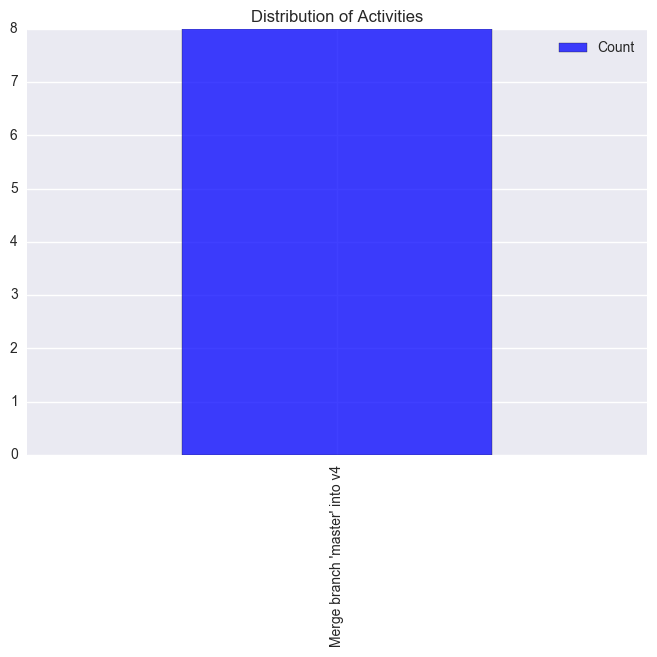

In [27]:
plt.figure(figsize=(18,10))
activity_count.query('Count > 5').plot(kind='bar', color="blue", alpha=.75)
plt.title("Distribution of Activities")
plt.show()

In [28]:
#####################

In [29]:
#####################

In [ ]:
############################

In [ ]:
##LEAVE THINGS ABOVE, BUT NOT RUN THEM

In [ ]:
#######

In [ ]:
#######

In [ ]:
#######

In [ ]:
#######

In [ ]:
#######

In [30]:
from sklearn import cross_validation
from sklearn.preprocessing import *
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import *
from sklearn.cross_validation import KFold
import random

In [31]:
dfTest = pd.read_csv('jQuery_Training.csv', index_col=0, encoding="utf-8")
dfFinal = dfTest.drop("activity", 1).drop("files", 1).drop("text", 1).drop("date", 1).drop("author", 1)
X = dfFinal.values
y = dfTest.activity.values

In [32]:
dfTest.head()

,author,date,activity,text,files,n_files,insertions,deletions,pat_code,pat_doc,pat_test,pat_build,text_code,text_doc,text_test,text_build,subjectivity,polarity
8816caf26c0acc7067cd5bad9c03cfb54e54979,alex@louden.com,Thu Jan 5 16:49:02 2017 +0800,Docs,Docs: Correct typo in issue template\r\n,"[' .github/ISSUE_TEMPLATE.md | 2 +-\n', ' 1 fi...",1.0,1.0,1.0,1,2,0,2,0,1,0,0,0,0
10ac0e532a9376106c50f0c21a0d0fd0483b700,m.goleb@gmail.com,Fri Dec 30 12:17:00 2016 +0100,Build,Build: Drop support for building on Node.j...,"[' .travis.yml | 1 -\n', ' Gruntfile.js | 39...",2.0,11.0,29.0,2,3,0,3,0,0,1,2,0,0
d9145fa15d91ab6c804161ecd892d4d08b71aa2,broder93@gmail.com,Sat Dec 24 10:33:27 2016 +0000,Tests,Tests: Added tests for symbol-separated ta...,[' test/unit/core.js | 27 ++++++++++++++++++--...,1.0,18.0,9.0,1,2,0,2,0,0,2,0,0,0
cb4cd71ef018854f75646270bacd4c4d3da9cde,richard.gibson@gmail.com,Mon Dec 19 11:58:48 2016 -0500,Build,Build: Use valid ecmaVersion\r\n \r\n ...,[' test/node_smoke_tests/.eslintrc.json | 2 +-...,1.0,1.0,1.0,1,2,0,2,0,0,1,1,0,0
754e315f8a7760bcdc162712d2be7fee058fdc2,m.goleb@gmail.com,Wed Nov 30 15:32:29 2016 +0100,Build,Build: Add most of the dist folder to .esl...,"[' .eslintignore | 2 ++\n', ' 1 file changed, ...",1.0,2.0,0.0,0,2,0,2,0,0,0,1,0,0


In [33]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.25)
y_train

array(['Build', 'Tests', 'Tests', 'Build', 'Tests', 'Build', 'Tests',
       'Release', 'Tests', 'Build', 'Core', 'Build', 'Build', 'Core',
       'Core', 'Build', 'Build', 'Tests', 'Build', 'Build', 'Core', 'Core',
       'Release', 'Core', 'Build', 'Build', 'Core', 'Docs', 'Core',
       'Tests', 'Tests', 'Release', 'Core', 'Build', 'Release', 'Build',
       'Tests', 'Build', 'Build', 'Build', 'Build', 'Tests', 'Tests',
       'Docs', 'Build', 'Core', 'Release', 'Release', 'Tests', 'Tests',
       'Build', 'Docs', 'Release', 'Build', 'Tests', 'Build', 'Tests',
       'Core', 'Tests', 'Core', 'Tests', 'Tests', 'Tests', 'Core', 'Build',
       'Build', 'Build', 'Tests', 'Build', 'Build', 'Docs', 'Build',
       'Tests', 'Build', 'Tests', 'Tests', 'Build', 'Docs', 'Tests',
       'Build', 'Core', 'Build', 'Tests', 'Build', 'Core', 'Build',
       'Build', 'Build', 'Build', 'Core', 'Build', 'Tests', 'Build',
       'Core', 'Core', 'Core', 'Tests', 'Release', 'Build', 'Docs',
       'Bui

In [34]:
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
"accuracy: %.1f percent"%(100*accuracy)

D:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


'accuracy: 82.1 percent'

In [35]:
df.describe()

D:\Anaconda\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,n_files,insertions,deletions,pat_code,pat_doc,pat_test,pat_build,text_code,text_doc,text_test,text_build,subjectivity,polarity
count,5488.000000,5488.000000,4495.000000,5499.000000,5499.000000,5499.000000,5499.000000,5499.000000,5499.000000,5499.000000,5499.000000,5499.000000,5499.000000
mean,1.958819,37.254009,22.274750,1.371704,2.958902,0.129478,2.958902,0.081833,0.051464,0.059284,0.004728,0.019458,-0.000182
std,5.684088,189.837873,181.337401,4.054876,5.678399,0.497321,5.678399,0.346257,0.271890,0.327216,0.098992,0.138141,0.023359
min,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,NaN,NaN,NaN,1.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,1.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,NaN,1.000000,3.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,151.000000,9460.000000,8967.000000,150.000000,152.000000,15.000000,152.000000,7.000000,7.000000,9.000000,5.000000,1.000000,1.000000


In [36]:
dfComplete = df.copy()
dfComplete['deletions'] = dfComplete['deletions'].fillna(0)
dfComplete['n_files'] = dfComplete['n_files'].fillna(0)
dfComplete['insertions'] = dfComplete['insertions'].fillna(0)
dfComplete.describe()

,n_files,insertions,deletions,pat_code,pat_doc,pat_test,pat_build,text_code,text_doc,text_test,text_build,subjectivity,polarity
count,5499.000000,5499.000000,5499.000000,5499.000000,5499.000000,5499.000000,5499.000000,5499.000000,5499.000000,5499.000000,5499.000000,5499.000000,5499.000000
mean,1.954901,37.179487,18.207856,1.371704,2.958902,0.129478,2.958902,0.081833,0.051464,0.059284,0.004728,0.019458,-0.000182
std,5.679074,189.655177,164.171995,4.054876,5.678399,0.497321,5.678399,0.346257,0.271890,0.327216,0.098992,0.138141,0.023359
min,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,1.000000,2.000000,1.000000,1.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,5.000000,2.000000,1.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,20.000000,7.000000,1.000000,3.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,151.000000,9460.000000,8967.000000,150.000000,152.000000,15.000000,152.000000,7.000000,7.000000,9.000000,5.000000,1.000000,1.000000


In [37]:
dfCompleteX = dfComplete.drop("activity", 1).drop("files", 1).drop("text", 1).drop("date", 1).drop("author", 1)

In [38]:
dfCompleteX.head()

,n_files,insertions,deletions,pat_code,pat_doc,pat_test,pat_build,text_code,text_doc,text_test,text_build,subjectivity,polarity
5aed69a5025cbda52960610eb54082f03f5a915,1.0,4.0,0.0,1,2,0,2,0,0,0,0,0,0
1af74da531f7ac7b08e6fcad37892dbf5375664,4.0,161.0,19.0,2,5,1,5,0,0,1,0,0,0
9ad3b619ba9ea481f2847fb85aed647b67d17d1,1.0,6.0,6.0,1,2,0,2,0,0,0,0,0,0
2162728938e8536d39a3f9937d7eb905e00eb9b,1.0,2.0,2.0,1,2,0,2,0,0,0,0,0,0
3638df40c9631155b1985f0ee63b6ffe2398b6a,7.0,45.0,16.0,3,8,0,8,0,0,0,0,0,0


In [39]:
dfComplete["predicted"] = clf.predict(dfCompleteX)

In [40]:
dfComplete.describe()

,n_files,insertions,deletions,pat_code,pat_doc,pat_test,pat_build,text_code,text_doc,text_test,text_build,subjectivity,polarity
count,5499.000000,5499.000000,5499.000000,5499.000000,5499.000000,5499.000000,5499.000000,5499.000000,5499.000000,5499.000000,5499.000000,5499.000000,5499.000000
mean,1.954901,37.179487,18.207856,1.371704,2.958902,0.129478,2.958902,0.081833,0.051464,0.059284,0.004728,0.019458,-0.000182
std,5.679074,189.655177,164.171995,4.054876,5.678399,0.497321,5.678399,0.346257,0.271890,0.327216,0.098992,0.138141,0.023359
min,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,1.000000,2.000000,1.000000,1.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,5.000000,2.000000,1.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,20.000000,7.000000,1.000000,3.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,151.000000,9460.000000,8967.000000,150.000000,152.000000,15.000000,152.000000,7.000000,7.000000,9.000000,5.000000,1.000000,1.000000


In [41]:
x = {'Count': pd.Series(dfComplete.predicted.value_counts())
     }
activity_count = pd.DataFrame(x)
activity_count.head()

,Count
Core,4952
Tests,280
Docs,243
Build,22
Release,2


In [41]:
dfComplete[["activity", "predicted"]]

,activity,predicted
5aed69a5025cbda52960610eb54082f03f5a915,"[css mode] Support lineComment option, enable ...",Core
1af74da531f7ac7b08e6fcad37892dbf5375664,[sass mode] Use same token types as CSS/SCSS m...,Tests
9ad3b619ba9ea481f2847fb85aed647b67d17d1,[python mode] Accept underscores in number lit...,Core
2162728938e8536d39a3f9937d7eb905e00eb9b,[shell mode] Improve tokenizing of $'' strings,Core
3638df40c9631155b1985f0ee63b6ffe2398b6a,Mark version 5.23.0,Core
3c4e24a8e6c0bb078f5fb497edb484bd5523f12,[sublime bindings] Don't sort last line with n...,Core
709974d3b01dc6aa153de37edf4170b0431b1f6,"[dracula theme] Adjust colors, remove duplicat...",Core
166a44efbfcc9b84dc9efb4ec36da478370663d,[javascript mode] Improve TypeScript interface...,Core
79c1aeb941b8403c51be15a8e64c614ed61143f,TypeScript,Tests
6d9403c8e5511b5469e1009534e8266296d64ed,[merge addon] Fix incorrect compare,Core


In [42]:
dfTest2 = pd.read_csv('nodejs_Training.csv', index_col=0, encoding="utf-8")
dfFinal2 = dfTest2.drop("activity", 1).drop("files", 1).drop("text", 1).drop("date", 1).drop("author", 1)
X = dfFinal2.values
y = dfTest2.activity.values
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y)
clf2 = LinearDiscriminantAnalysis()
clf2.fit(X_train, y_train)
dfComplete["predicted2"] = clf2.predict(dfCompleteX)
dfComplete[["activity", "predicted", "predicted2"]]

D:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


,activity,predicted,predicted2
5aed69a5025cbda52960610eb54082f03f5a915,"[css mode] Support lineComment option, enable ...",Core,src
1af74da531f7ac7b08e6fcad37892dbf5375664,[sass mode] Use same token types as CSS/SCSS m...,Tests,test
9ad3b619ba9ea481f2847fb85aed647b67d17d1,[python mode] Accept underscores in number lit...,Core,src
2162728938e8536d39a3f9937d7eb905e00eb9b,[shell mode] Improve tokenizing of $'' strings,Core,src
3638df40c9631155b1985f0ee63b6ffe2398b6a,Mark version 5.23.0,Core,src
3c4e24a8e6c0bb078f5fb497edb484bd5523f12,[sublime bindings] Don't sort last line with n...,Core,src
709974d3b01dc6aa153de37edf4170b0431b1f6,"[dracula theme] Adjust colors, remove duplicat...",Core,src
166a44efbfcc9b84dc9efb4ec36da478370663d,[javascript mode] Improve TypeScript interface...,Core,src
79c1aeb941b8403c51be15a8e64c614ed61143f,TypeScript,Tests,test
6d9403c8e5511b5469e1009534e8266296d64ed,[merge addon] Fix incorrect compare,Core,src


In [43]:
def accuracy_dist(name, x, y, dfComplete):
    print("----")
    print(name)
    correct = len(dfComplete[dfComplete.predicted.isin([x])][dfComplete.predicted2.isin([y])])
    wrong = len(dfComplete[dfComplete.predicted.isin([x])][~dfComplete.predicted2.isin([y])]) + len(dfComplete[~dfComplete.predicted.isin([x])][dfComplete.predicted2.isin([y])])
    print(correct/(correct + wrong))
    print("Same")
    print(correct)
    print("Different")
    print(wrong)
    print("----")
accuracy_dist("CORE",  "Core", "src", dfComplete)
accuracy_dist("BUILD", "Build", "build", dfComplete)
accuracy_dist("DOCS",  "Docs", "doc", dfComplete)
accuracy_dist("TEST", "Tests", "test",  dfComplete)

----
CORE
0.9627553063676412
Same
4808
Different
186
----
----
BUILD
0.8181818181818182
Same
18
Different
4
----
----
DOCS
0.9794238683127572
Same
238
Different
5
----
----
TEST
0.8035087719298246
Same
229
Different
56
----


D:\Anaconda\lib\site-packages\ipykernel\__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
D:\Anaconda\lib\site-packages\ipykernel\__main__.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


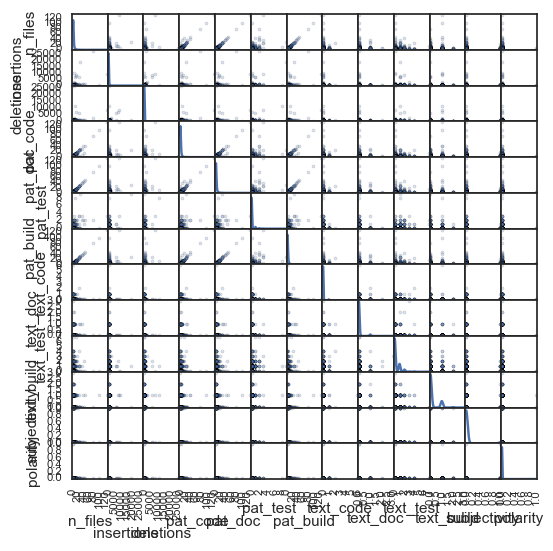

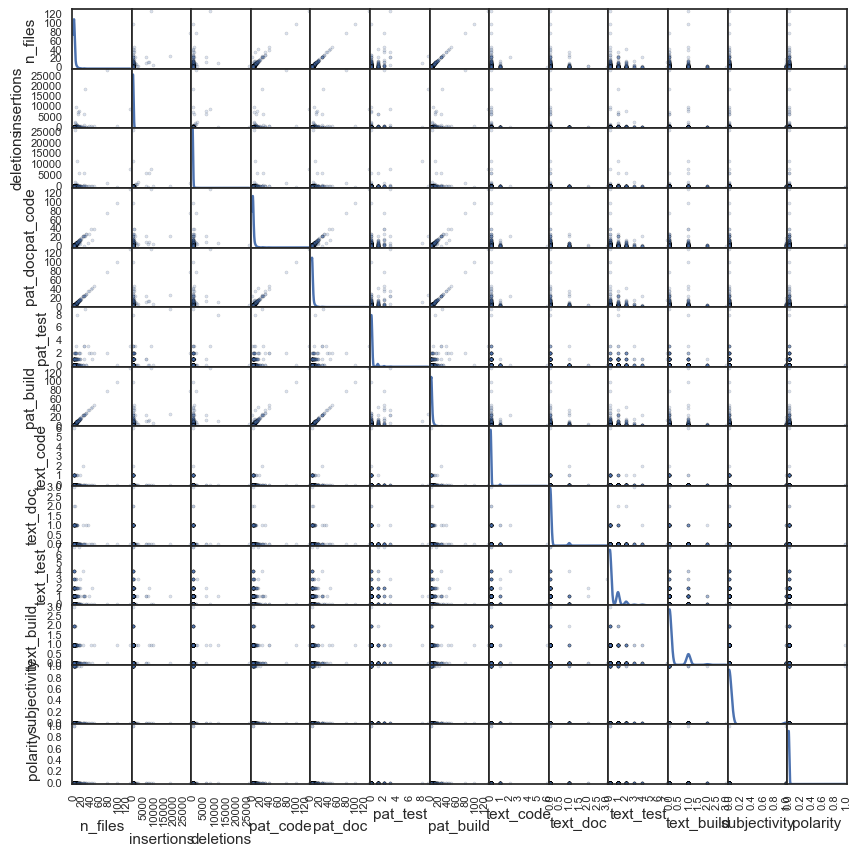

In [185]:
from pandas.tools.plotting import scatter_matrix

scatter_matrix(dfComplete, alpha=0.2, figsize=(10, 10), diagonal='kde')
plt.show()

In [130]:
clf = GaussianNB()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
"accuracy: %.1f percent"%(100*accuracy)

'accuracy: 61.1 percent'

In [131]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
"accuracy: %.1f percent"%(100*accuracy)

'accuracy: 54.7 percent'

In [132]:
scaler = StandardScaler().fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [140]:
clf = KNeighborsClassifier()
clf.fit(X_train_sc, y_train)
accuracy = clf.score(X_test_sc, y_test)
"accuracy: %.1f percent"%(100*accuracy)

'accuracy: 87.4 percent'

In [139]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
"accuracy: %.1f percent"%(100*accuracy)

'accuracy: 85.3 percent'

In [138]:
def accuracy_dist(clfs, X, y, n=10):
    accuracy = np.zeros((n,len(clfs)))
    columns = [clf.__class__.__name__ for clf in clfs]
    for i in range(n):
        X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, random_state=31*i)
        for j in range(len(clfs)):
            clf = clfs[j]
            clf.fit(X_train,y_train)
            accuracy[i][j] = clf.score(X_test,y_test)
    return pd.DataFrame(accuracy, columns=columns, index=range(n))

C:\Program Files\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


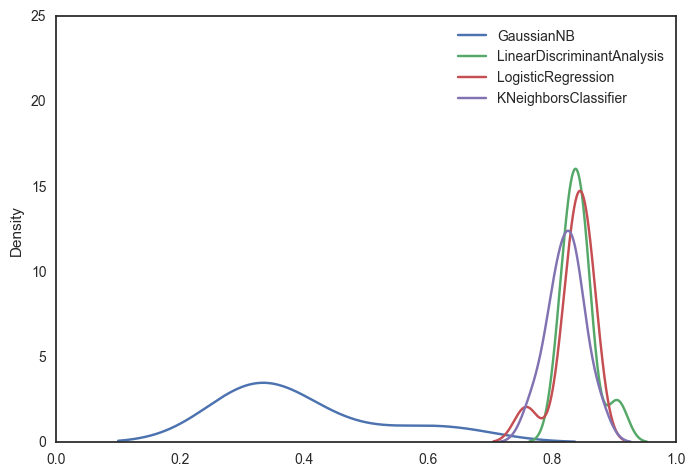

In [135]:
accuracy_df = accuracy_dist([GaussianNB(),LinearDiscriminantAnalysis(),LogisticRegression()], X, y)
accuracy_df = pd.concat(
    (accuracy_df, accuracy_dist([KNeighborsClassifier()], StandardScaler().fit_transform(X), y)), axis=1)
accuracy_df.plot(kind='kde', ylim=[0,25])
plt.show()

In [51]:
y = {'Count': pd.Series(df.author.value_counts())
     }
author_count = pd.DataFrame(y)
author_count.head()



,Count
timmywillisn@gmail.com,245
m.goleb@gmail.com,221
markelog@gmail.com,179
richard.gibson@gmail.com,145
dave.methvin@gmail.com,135


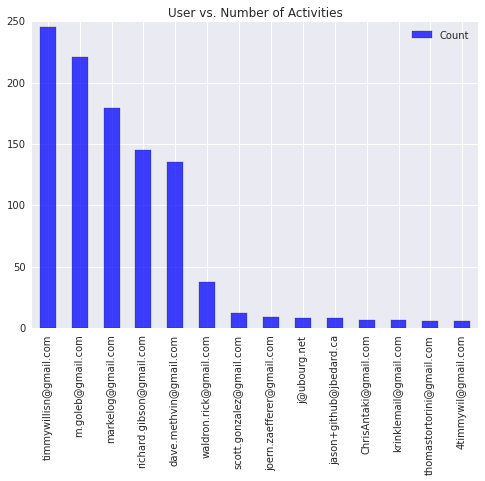

In [49]:
plt.figure(figsize=(18,10))
author_count.query('Count > 5').plot(kind='bar', color="blue", alpha=.75)
plt.title("User vs. Number of Activities")
plt.show()

In [ ]:
for index, row in df.iterrows(): 
    textblob = TextBlob(row['text'])
    df.set_value(index, 'polarity', textblob.sentiment.polarity) 
    df.set_value(index, 'subjectivity', textblob.sentiment.subjectivity) 
df.head()